# 대학마다 대학평가점수 예측 , 회기 알고리즘 - Linear Regression
---

In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [400]:
df = pd.read_csv('universityrank.csv')
df.shape

(5250, 6)

In [401]:
df.head()

,Year,Rank,Name,Point,City,Country
0,2018,1,Harvard University,97.7,Cambridge,United States
1,2018,2,University of Cambridge,94.6,Cambridge,United Kingdom
2,2018,2,University of Oxford,94.6,Oxford,United Kingdom
3,2018,4,Massachusetts Institute of Technology (MIT),92.5,Cambridge,United States
4,2018,5,Johns Hopkins University,92.1,Baltimore,United States


In [402]:
df.isna().sum()

Year         0
Rank         0
Name         0
Point      220
City         0
Country      1
dtype: int64

In [403]:
df = df.dropna(subset=['Point'])

In [404]:
df.isna().sum()

Year       0
Rank       0
Name       0
Point      0
City       0
Country    1
dtype: int64

<AxesSubplot: >

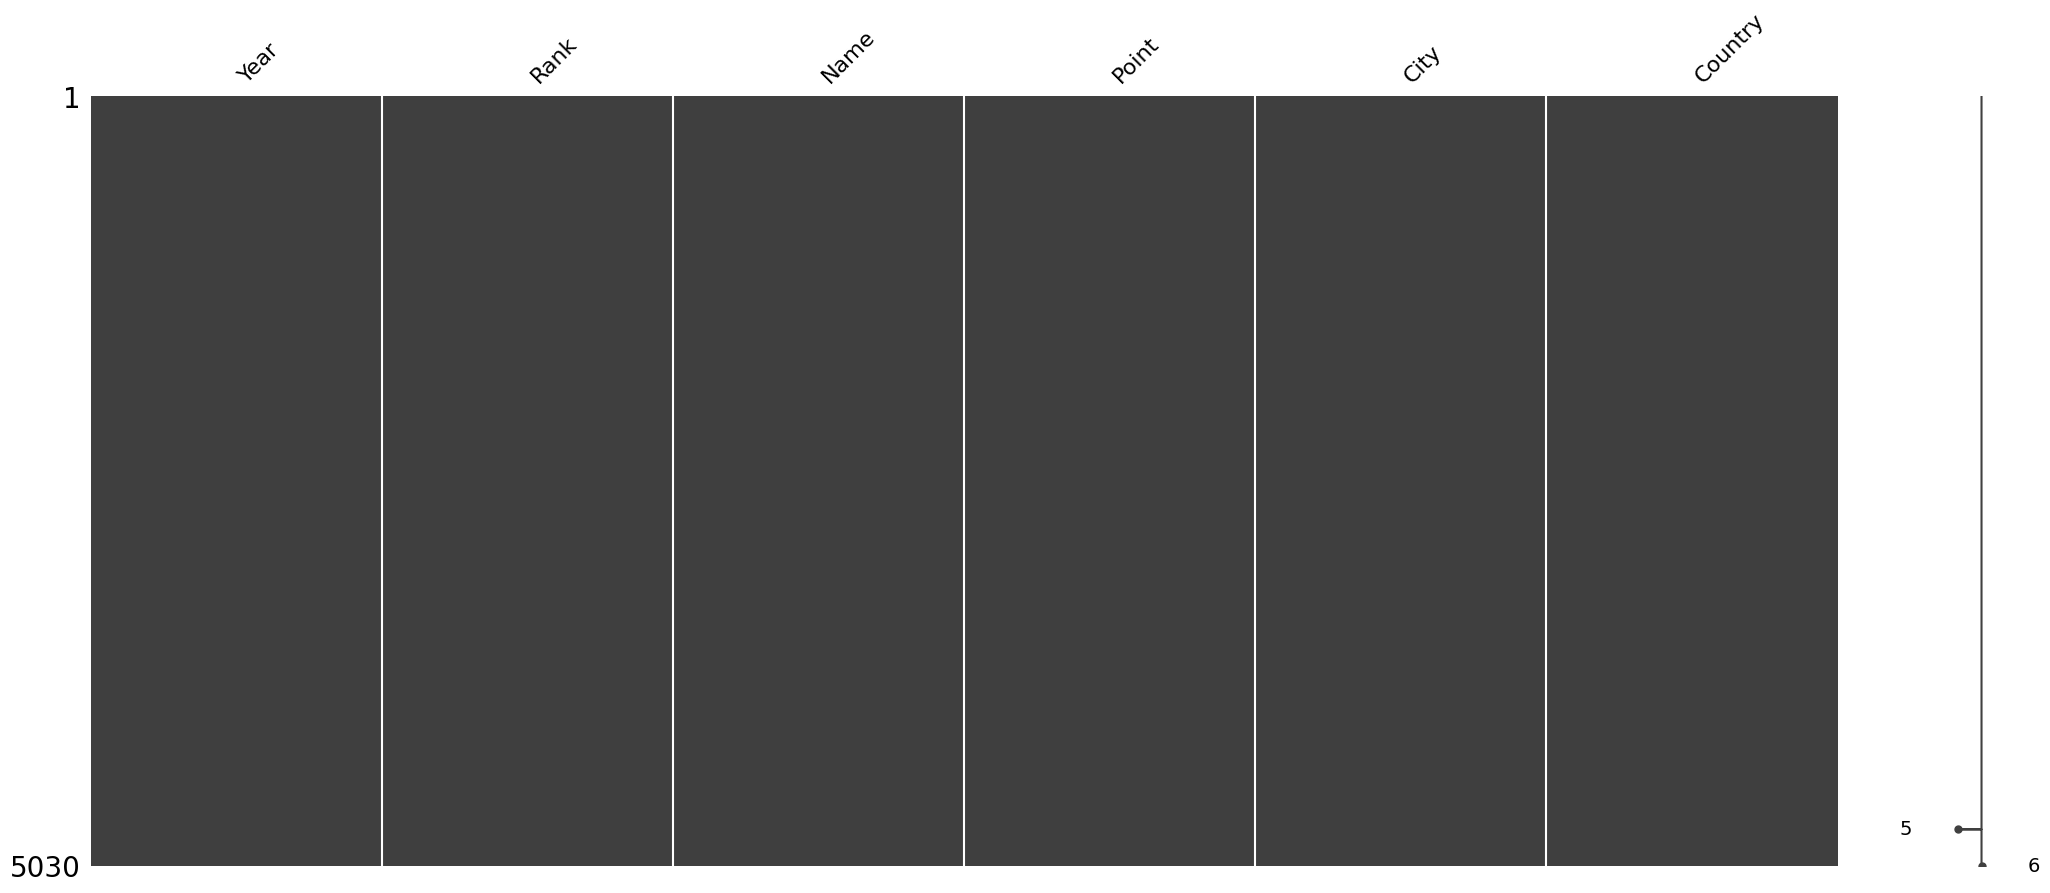

In [405]:
import missingno as msno

msno.matrix(df)

In [406]:
df.loc[df['Country'].isna()]

,Year,Rank,Name,Point,City,Country
4990,2022,90,Universit Paris-Saclay,75.4,Gif-sur-Yvette,NaN


In [407]:
df = df.dropna(subset=['Country'])

In [408]:
upperlist = []
for x in df.columns:
    upperlist.append(x.lower())

In [409]:
df.columns = upperlist

In [410]:
df.columns

Index(['year', 'rank', 'name', 'point', 'city', 'country'], dtype='object')

In [411]:
df.head()

,year,rank,name,point,city,country
0,2018,1,Harvard University,97.7,Cambridge,United States
1,2018,2,University of Cambridge,94.6,Cambridge,United Kingdom
2,2018,2,University of Oxford,94.6,Oxford,United Kingdom
3,2018,4,Massachusetts Institute of Technology (MIT),92.5,Cambridge,United States
4,2018,5,Johns Hopkins University,92.1,Baltimore,United States


In [412]:
df.loc[df['name']=='Harvard University']

,year,rank,name,point,city,country
0,2018,1,Harvard University,97.7,Cambridge,United States
350,2019,1,Harvard University,97.7,Cambridge,United States
700,2019,1,Harvard University,98.2,Cambridge,United States
1050,2020,1,Harvard University,97.7,Cambridge,United States
1400,2020,1,Harvard University,98.2,Cambridge,United States
1750,2020,1,Harvard University,98.5,Cambridge,United States
2100,2021,1,Harvard University,97.7,Cambridge,United States
2450,2021,1,Harvard University,98.2,Cambridge,United States
2800,2021,1,Harvard University,98.5,Cambridge,United States
3150,2021,1,Harvard University,98.6,Cambridge,United States


In [413]:
df['year'].unique()

array([2018, 2019, 2020, 2021, 2022], dtype=int64)

In [414]:
df['year'].value_counts()

2022    1670
2021    1343
2020    1009
2019     672
2018     335
Name: year, dtype: int64

In [415]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in ['year', 'rank', 'name', 'city', 'country']:
    df[col] = encoder.fit_transform(df[col])

In [416]:
x = df.drop(['point'],axis=1)
y = df['point']

In [417]:
# print(df['point']) = print(df.loc[:,'point'])

In [418]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2022)

In [419]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [420]:
y_train = y_train.values

In [421]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [422]:
lr.score(x_train, y_train)

0.9159386477474661

### 테스트

In [423]:
x_test = scaler.fit_transform(x_test)
y_test = y_test.values

In [424]:
x_test

array([[ 1.06252367, -1.39096624,  0.36384383,  1.52136185, -1.61697594],
       [-0.5521271 , -0.27999667,  0.40012003, -0.25321849,  0.90980406],
       [ 0.25519828, -0.9221167 , -0.65188986,  0.07817904,  0.84663456],
       ...,
       [ 0.25519828, -0.98327099, -1.0509281 , -0.02872339, -0.22724694],
       [-1.35945249, -1.30942719,  0.46360339, -1.01222574,  0.90980406],
       [-0.5521271 ,  0.70866432, -0.63375176, -0.14631606, -1.61697594]])

In [425]:
y_pred = lr.predict(x_test)

In [426]:
y_test, y_pred

(array([82.4, 70.1, 77.6, ..., 77.9, 80.1, 65.6]),
 array([81.49052415, 73.00321788, 78.33928902, ..., 78.56478308,
        80.7074709 , 64.78095958]))

In [427]:
examdf = pd.DataFrame(y_test)
examdf['y_pred'] = pd.DataFrame(y_pred)

In [428]:
examdf

,0,y_pred
0,82.4,81.490524
1,70.1,73.003218
2,77.6,78.339289
3,68.1,68.807102
4,60.9,58.977969
...,...,...
1001,66.6,66.610293
1002,62.6,60.172606
1003,77.9,78.564783
1004,80.1,80.707471


In [429]:
examdf.columns = ['y_test', 'y_pred']

In [430]:
examdf

,y_test,y_pred
0,82.4,81.490524
1,70.1,73.003218
2,77.6,78.339289
3,68.1,68.807102
4,60.9,58.977969
...,...,...
1001,66.6,66.610293
1002,62.6,60.172606
1003,77.9,78.564783
1004,80.1,80.707471


In [431]:
examdf['x_origin'] = pd.Series(range(0,1006))

In [432]:
examdf

,y_test,y_pred,x_origin
0,82.4,81.490524,0
1,70.1,73.003218,1
2,77.6,78.339289,2
3,68.1,68.807102,3
4,60.9,58.977969,4
...,...,...,...
1001,66.6,66.610293,1001
1002,62.6,60.172606,1002
1003,77.9,78.564783,1003
1004,80.1,80.707471,1004


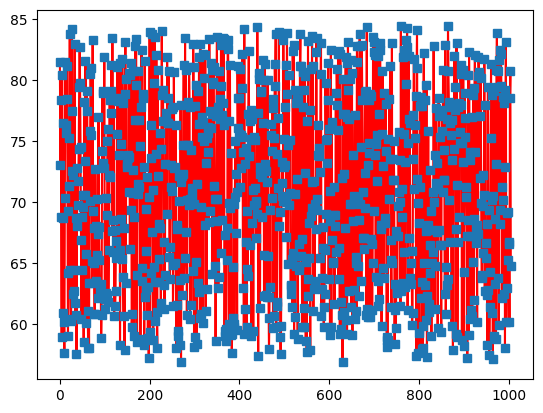

In [433]:
plt.plot(examdf['x_origin'], examdf['y_pred'], 'r')
plt.plot(examdf['x_origin'], examdf['y_pred'], 's')

In [434]:
from sklearn.metrics import mean_squared_error # mse 오차의 제곱의 평균

# MSE
mse = mean_squared_error(y_test, y_pred)
mse

5.24133835835532

In [435]:
rmse = np.sqrt(mse)
rmse

2.2893969420690943

In [436]:
from sklearn.model_selection import cross_val_score

mse = cross_val_score(lr, x_test, y_test,
                scoring='neg_mean_squared_error',
               cv=1000) 

In [437]:
np.mean(np.sqrt(-mse))

1.6979128905667458